# TP4 - Reconnaissance de l'Iris
L'objectif de ce TP est de comprendre et d'implémenter un système de reconnaissance de l'iris à partir d'images issues de la base de données CASIA.

In [3]:
# Importation des bibliothèques nécessaires
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from scipy.spatial.distance import hamming

## Étape 1 : Chargement de l'image de l'iris

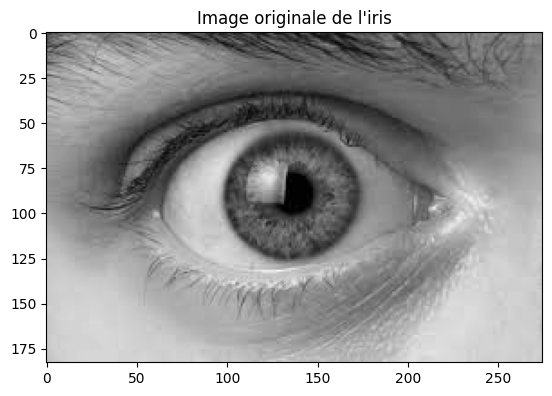

In [4]:
# Charger une image de l'iris
image_path = 'images.jpg'  # Remplace par le chemin correct
iris_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(iris_image, cmap='gray')
plt.title('Image originale de l\'iris')
plt.show()

## Étape 2 : Détection de la pupille avec la transformée de Hough

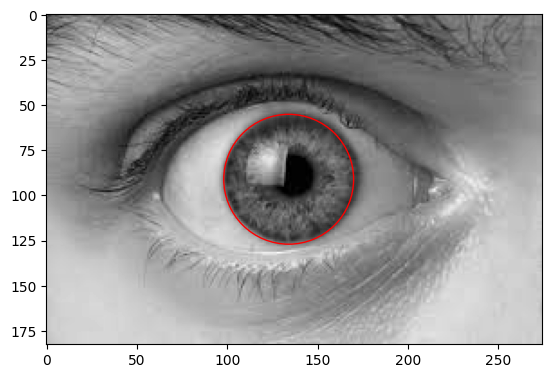

In [5]:
# Détection des bords
edges = canny(iris_image, sigma=2.0)

# Détection des cercles
hough_radii = np.arange(20, 50, 2)
hough_res = hough_circle(edges, hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=1)

# Dessiner le cercle détecté
fig, ax = plt.subplots()
ax.imshow(iris_image, cmap='gray')
for center_y, center_x, radius in zip(cy, cx, radii):
    circ = plt.Circle((center_x, center_y), radius, color='red', fill=False)
    ax.add_patch(circ)
plt.show()

## Étape 3 : Amélioration de l'image avec égalisation d'histogramme

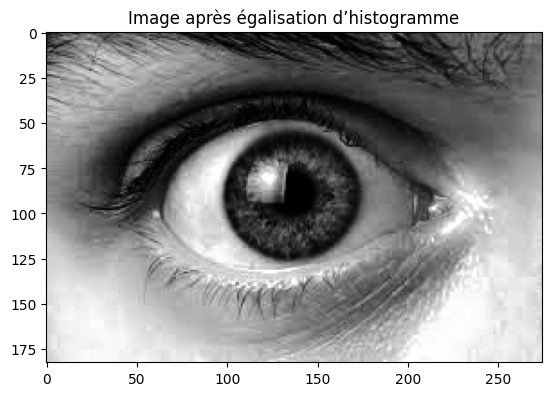

In [6]:
# Égalisation de l'histogramme
equalized_image = cv2.equalizeHist(iris_image)
plt.imshow(equalized_image, cmap='gray')
plt.title('Image après égalisation d’histogramme')
plt.show()

## Étape 4 : Normalisation de l'iris (Transformation en bande rectangulaire)

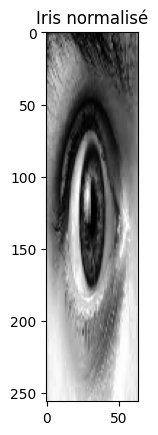

In [7]:
# Simulation de la normalisation
normalized_iris = cv2.resize(equalized_image, (64, 256))  # Normalisation en une bande
plt.imshow(normalized_iris, cmap='gray')
plt.title('Iris normalisé')
plt.show()

## Étape 5 : Extraction des caractéristiques avec CNN

In [8]:
# Création d'un modèle CNN simple
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(256, 64, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu')
])

# Simulation des caractéristiques extraites
features_iris = np.random.rand(64)  # Simulé
print('Caractéristiques extraites:', features_iris)

c:\Users\ANASS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Caractéristiques extraites: [0.05212207 0.82341449 0.23945176 0.16931249 0.09093354 0.20675939
 0.16870575 0.12590934 0.37648088 0.27156985 0.08000172 0.34040165
 0.06800177 0.66762032 0.70318304 0.89619365 0.3597174  0.14533417
 0.38412477 0.09414327 0.82789198 0.61266181 0.00215472 0.52270653
 0.41421952 0.33011845 0.59956082 0.08251386 0.35322112 0.25725321
 0.87263702 0.88830251 0.7011223  0.99711631 0.43907857 0.77756489
 0.14779475 0.8646239  0.88412529 0.33996578 0.82421704 0.11671075
 0.17946135 0.62730007 0.58263486 0.17810497 0.38534872 0.81717345
 0.69661631 0.83969181 0.03244562 0.96406142 0.56873015 0.66507902
 0.96251086 0.43814554 0.26702585 0.95570891 0.80228745 0.7884836
 0.9178621  0.37209147 0.48430277 0.75903501]


## Étape 6 : Comparaison avec la distance de Hamming

In [9]:
# Simulation d'un autre iris
features_iris2 = np.random.rand(64)

# Calcul de la distance de Hamming
hamming_distance = hamming(features_iris, features_iris2)
print(f'Distance de Hamming entre les deux iris : {hamming_distance}')

Distance de Hamming entre les deux iris : 1.0
